In [4]:
data_column = [
    "value",
    "time",
    "commodity_id"
    "commodity_name",
    "avg_value",
    "max_value",
    "min_value",
    "city_id",
    "city_name",
    "Year",
    "month",

]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("cities_2024.csv")
data.head()

,value,time,commodity_id,commodity_name,avg_value,max_value,min_value,city_id,city_name,Year,Month
0,14200,2024-01-01,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
1,14500,2024-01-02,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
2,14333,2024-01-03,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
3,14200,2024-01-04,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
4,13667,2024-01-05,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1


In [3]:
data['time'] = pd.to_datetime(data['time'])

data = data.astype({
    'value': 'int32',
    'avg_value': 'int32',
    'max_value': 'int32',
    'min_value': 'int32',
    'commodity_id': 'int16',
    'city_id': 'int8',
    'Year': 'int16',
    'Month': 'int8',
    'commodity_name': 'category',
    'city_name': 'category'
})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65851 entries, 0 to 65850
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           65851 non-null  int32         
 1   time            65851 non-null  datetime64[ns]
 2   commodity_id    65851 non-null  int16         
 3   commodity_name  65851 non-null  category      
 4   avg_value       65851 non-null  int32         
 5   max_value       65851 non-null  int32         
 6   min_value       65851 non-null  int32         
 7   city_id         65851 non-null  int8          
 8   city_name       65851 non-null  category      
 9   Year            65851 non-null  int16         
 10  Month           65851 non-null  int8          
dtypes: category(2), datetime64[ns](1), int16(2), int32(4), int8(2)
memory usage: 2.0 MB


In [5]:
data.isnull().sum()

value             0
time              0
commodity_id      0
commodity_name    0
avg_value         0
max_value         0
min_value         0
city_id           0
city_name         0
Year              0
Month             0
dtype: int64

In [6]:
data.describe()

,value,time,commodity_id,avg_value,max_value,min_value,city_id,Year,Month
count,65851.000000,65851,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.0,65851.000000
mean,38308.081031,2024-07-02 07:13:38.010356736,18.825090,38308.085375,42173.188592,34849.471519,3.006105,2024.0,6.538716
min,0.000000,2024-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,2024.0,1.000000
25%,14235.500000,2024-03-30 00:00:00,10.000000,14266.000000,15120.000000,13250.000000,2.000000,2024.0,3.000000
50%,22000.000000,2024-07-04 00:00:00,19.000000,22044.000000,27500.000000,20500.000000,3.000000,2024.0,7.000000
75%,43750.000000,2024-10-02 00:00:00,28.000000,43797.000000,48000.000000,40333.000000,4.000000,2024.0,10.000000
max,430000.000000,2024-12-31 00:00:00,37.000000,150922.000000,430000.000000,150000.000000,7.000000,2024.0,12.000000
std,38190.039389,NaN,10.630044,38029.287943,40864.179397,35075.083767,1.418907,0.0,3.465088


In [7]:
data.head()

,value,time,commodity_id,commodity_name,avg_value,max_value,min_value,city_id,city_name,Year,Month
0,14200,2024-01-01,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
1,14500,2024-01-02,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
2,14333,2024-01-03,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
3,14200,2024-01-04,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1
4,13667,2024-01-05,1,Beras IR. I (IR 64),14141,14500,11220,5,Jakarta Utara,2024,1


In [8]:
# Hilaning data daily_price yang hanya 0
data= data[data["value"] > 0]
print(len(data))

65849


In [9]:
def plot_commodity_trend(commodity_keyword):
    subset = data[data["commodity_name"].str.contains(commodity_keyword, case=False,na=False)]
    if subset.empty:
        print(f"Tidak ada data untuk {commodity_keyword}")

    plt.figure(figsize=(24,12))
    sns.lineplot(data=subset, x="time", y="value", hue="Month", markers="o", markersize=4)
    plt.title(f"Tren Harga: {commodity_keyword} (2024)")
    plt.xlabel("Waktu")
    plt.ylabel("Harga Tren")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
data["commodity_name"].value_counts()

commodity_name
Daging Sapi Has (Paha Belakang)    1812
Susu Kental Bendera 200gr          1812
Bawang Putih                       1811
Margarin Blueband Cup              1811
Daging Sapi Murni (Semur)          1811
Beras IR. III (IR 64)              1810
Bawang Merah                       1810
Beras IR 42/Pera                   1809
Beras IR. II (IR 64) Ramos         1809
Tepung Terigu                      1809
Ayam Broiler/Ras                   1808
Margarin Blueband Sachet           1808
Gula Pasir                         1808
Minyak Goreng (Kuning/Curah)       1808
Cabe Rawit Hijau                   1808
Cabe Rawit Merah                   1808
Cabe Merah Besar (TW)              1808
Telur Ayam Ras                     1808
Beras IR. I (IR 64)                1808
Semangka                           1807
Kelapa Kupas                       1807
Susu Kental Enak 200gr             1807
Kentang (sedang)                   1807
Tomat Buah                         1807
Ikan Bandeng (sedang)    

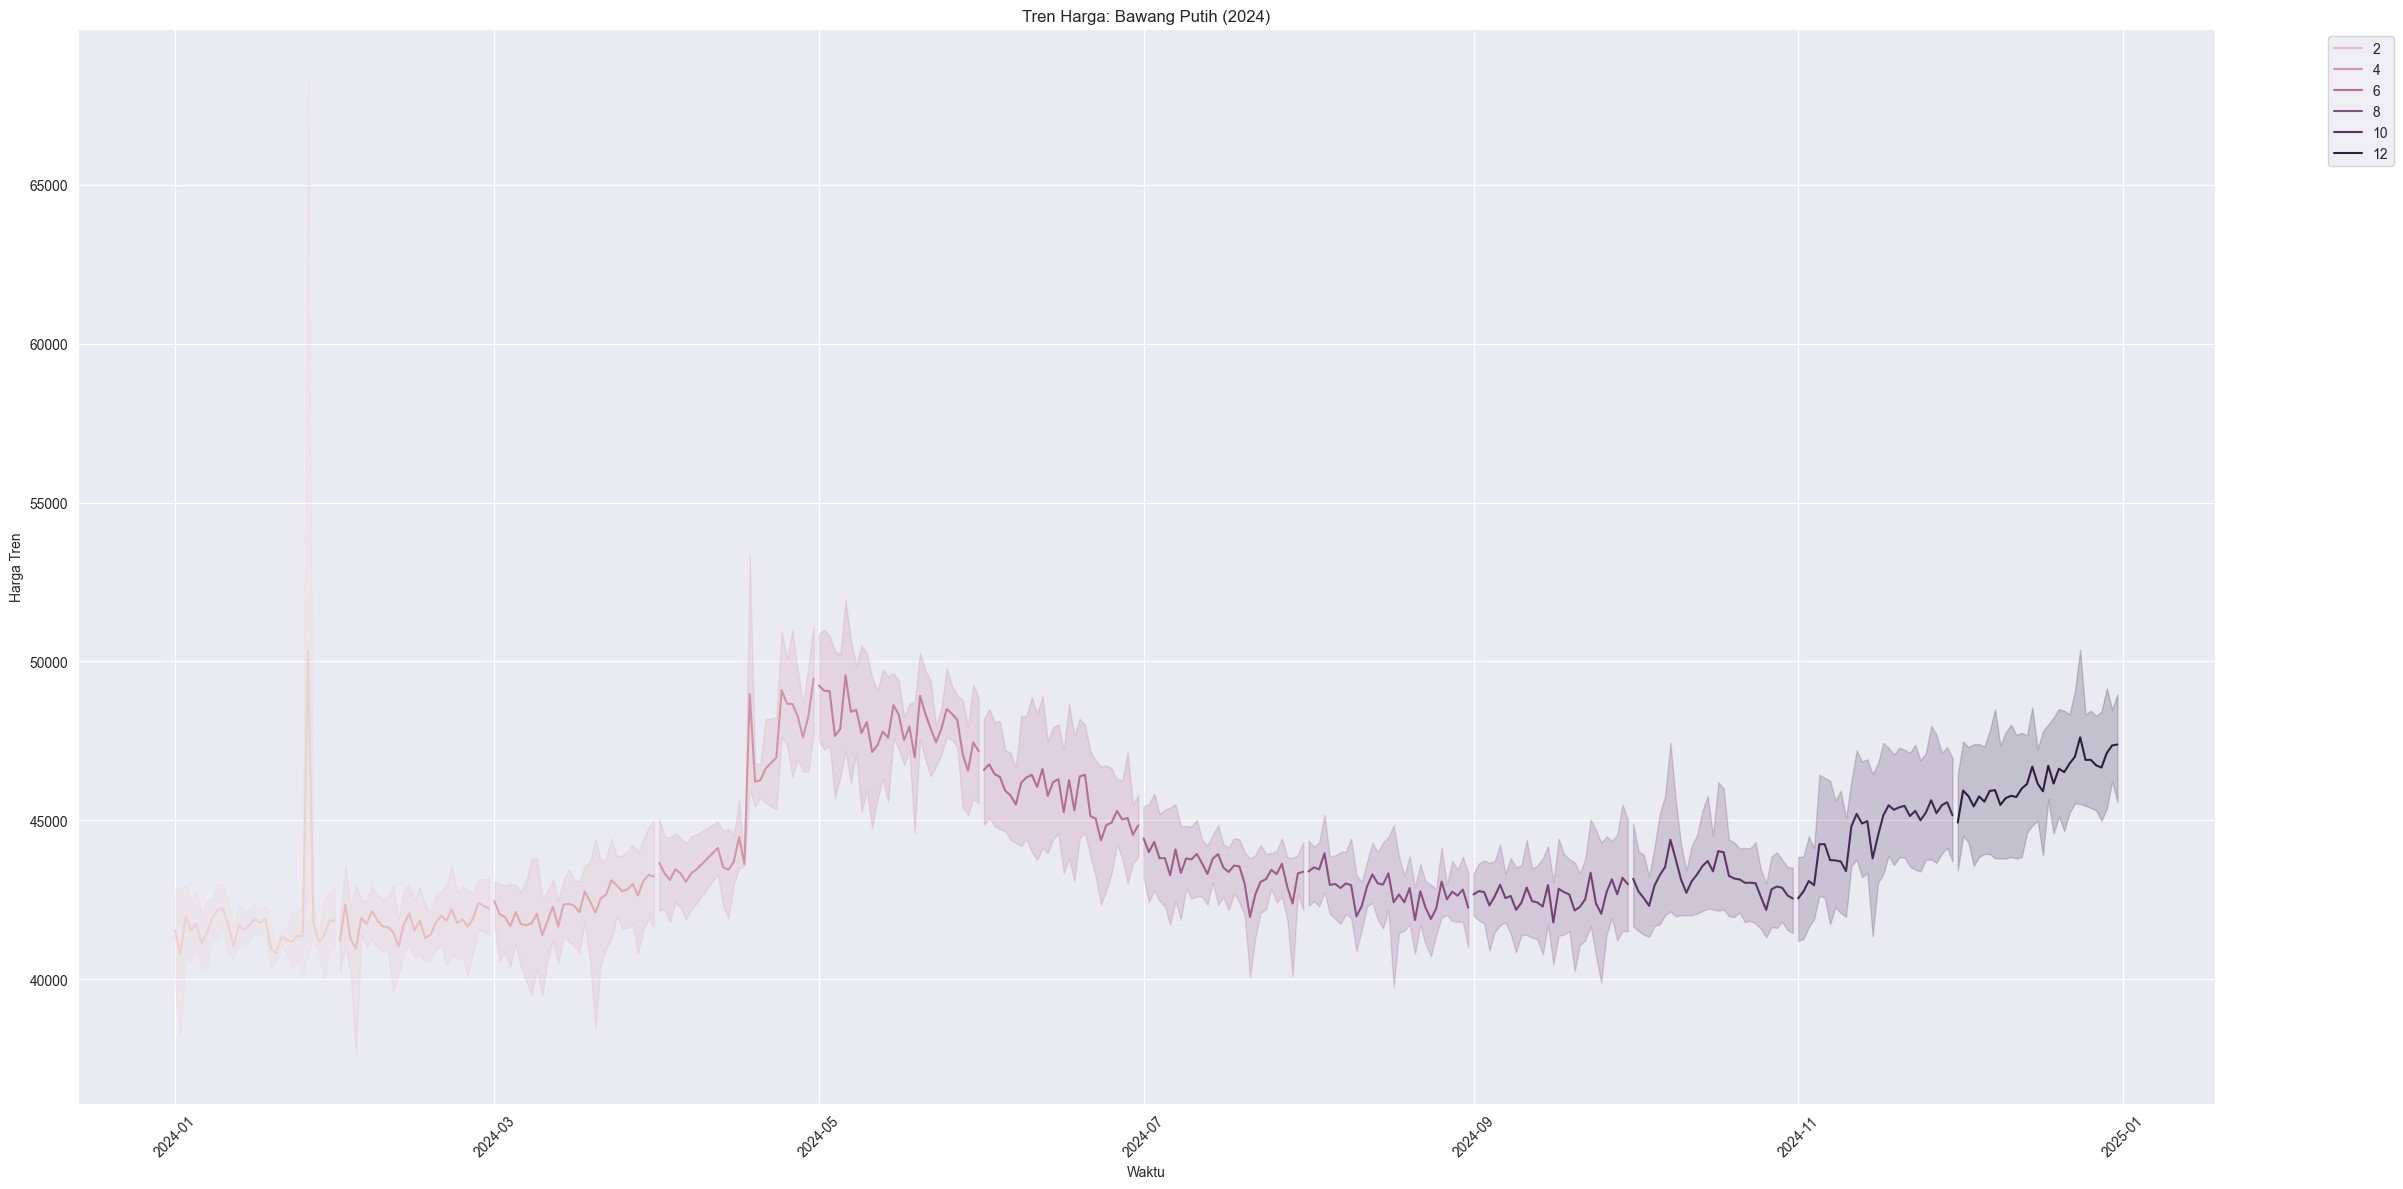

In [11]:
plot_commodity_trend("Bawang Putih")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65849 entries, 0 to 65850
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           65849 non-null  int32         
 1   time            65849 non-null  datetime64[ns]
 2   commodity_id    65849 non-null  int16         
 3   commodity_name  65849 non-null  category      
 4   avg_value       65849 non-null  int32         
 5   max_value       65849 non-null  int32         
 6   min_value       65849 non-null  int32         
 7   city_id         65849 non-null  int8          
 8   city_name       65849 non-null  category      
 9   Year            65849 non-null  int16         
 10  Month           65849 non-null  int8          
dtypes: category(2), datetime64[ns](1), int16(2), int32(4), int8(2)
memory usage: 2.5 MB
